In [1]:
from numpy.core.defchararray import lower, upper
from utils_mf import * 
from lsa_mfea import * 
from mfea import * 
np.random.seed(0)

def switch_func(i):
    switcher = {
        0: [1],
        1: [2],
        2: [4],
        3: [1, 2, 3],
        4: [4,5,6],
        5: [2,5,7],
        6: [3,4,6],
        7: [2,3,4,5,6],
        8: [2,3,4,5,6,7],
        9: [3,4,5,6,7]

    }
    assert i <10 and i >= 0
    return switcher.get(i)


def switch_task(i, matrix, bias, dim):
    switcher = {
        1: Sphere(matrix, bias, dimension= dim, lower= -100, upper = 100),
        2: Rosenbrock(matrix, bias, dimension= dim, lower= -50, upper= 50),
        3: Ackley(matrix, bias, dimension= dim, lower= -50, upper= 50),
        4: Rastrigin(matrix, bias, dimension= dim, lower = -50, upper = 50),
        5: Girewank(matrix, bias, dimension= dim, lower = -100, upper= 100),
        6: Weierstrass(matrix, bias, dimension= dim, lower = -0.5, upper= 0.5),
        7: Schewefel(matrix, bias, dimension= dim, lower = -500, upper= 500)
    }
    # print(i)
    # print(Sphere(matrix, bias, dimension= dim, lower= -100, upper = 100).name)

    assert i >= 1 and i <= 7
    return switcher.get(i)

def load_file(path_file):
    input = np.loadtxt(path_file)
    return input

def switch_task_CEC(i, matrix, bias, dim, lower, upper):
    switcher = {
        1: Sphere(matrix, bias, dim, lower,upper),
        2: Sphere(matrix, bias, dim, lower,upper),
        3: Sphere(matrix, bias, dim, lower,upper),
        4: Weierstrass(matrix, bias, dim, lower,upper),
        5: Rosenbrock(matrix, bias, dim, lower,upper),
        6: Ackley(matrix, bias, dim, lower,upper),
        7: Weierstrass(matrix, bias, dim, lower,upper),
        8: Schewefel(matrix, bias, dim, lower,upper),
        9: Girewank(matrix, bias, dim, lower,upper),
        10: Rastrigin(matrix, bias, dim, lower,upper),
    }
    assert i >= 1 and i <= 10 
    return switcher.get(i) 

def getManyTask50():
    tasks = [] 
    number = 1
    tasks_size = int(NUMBER_TASKS/number); 
    for index in range(number): 
        dim = 50
        # index += 5
        choice_functions = switch_func(index) 
        for task_id in range(tasks_size):
            task_id += 1 

            function_id = choice_functions[(task_id -1) % len(choice_functions)]
            file_dir = "./GECCO/Tasks/benchmark_" + str(index+1); 
            file_matrix = file_dir + "/matrix_" + str(task_id) 
            file_bias = file_dir + "/bias_" + str(task_id)
            matrix = load_file(file_matrix)
            bias = load_file(file_bias)
            assert matrix.shape == (50,50)
            assert bias.shape == (50,)
            tasks.append(switch_task(function_id, matrix, bias, dim))
    
    return tasks 

def getManyTasks10():
    dim = 50 
    tasks = [] 
    # task 1 
    matrix = np.eye(dim) 
    bias = np.zeros(dim) 
    tasks.append(Sphere(matrix, bias, dim, -100, 100)) 

    #task 2 
    matrix = np.eye(dim) 
    bias = np.zeros(dim) + 80; 
    tasks.append(Sphere(matrix, bias, dim, -100, 100)) 

    # tasks 3 
    matrix = np.eye(dim) 
    bias = np.zeros(dim) - 80; 
    tasks.append(Sphere(matrix, bias, dim, -100, 100)) 

    # task 4 
    dim = 25
    bias = np.zeros(dim) - 0.4 
    matrix = np.eye(dim) 
    tasks.append(Weierstrass(matrix, bias,dim, -0.5, 0.5))

    # task 5
    dim = 50
    matrix = np.eye(dim) 
    bias = np.zeros(dim) -1 
    tasks.append(Rosenbrock(matrix, bias, dim, lower= -50, upper = 50))

    # task 6 

    matrix = np.eye(dim) 
    bias = np.zeros(dim) + 40
    tasks.append(Ackley(matrix, bias, dim, -50, 50))

    # task 7 
    dim = 50 
    bias = np.zeros(dim) - 0.4 
    matrix = np.eye(dim) 
    tasks.append(Weierstrass(matrix, bias,dim, -0.5, 0.5))

    # task 8 
    dim = 50 
    bias = np.zeros(dim) 
    matrix = np.eye(dim) 
    tasks.append(Schewefel(matrix, bias, dim, -500, 500))

    # tasks 9 
    bias = np.zeros(dim) 
    bias[:int(dim/2)] += -80 
    bias[int(dim/2):] += 80 
    tasks.append(Girewank(matrix, bias, dim, lower=-100, upper=100))

    # task 10 
    bias = np.zeros(dim) 
    bias[:int(dim/2)] += 40 
    bias[int(dim/2):] += -40 
    tasks.append(Rastrigin(matrix, bias, dim, lower = -50, upper= 50))
    return tasks
    



loop: 1000 / 1000 ||: 100%|██████████| 1000/1000 [04:39<00:00,  3.58it/s]


6.867999233679167
1.3241965655121015
4.192188303755805
0.8470552602662238
1454.7192460736926
0.6546257219331264
3.2140619891774236
3462.7033897522415
1.0012542153793385
132.54531261528814


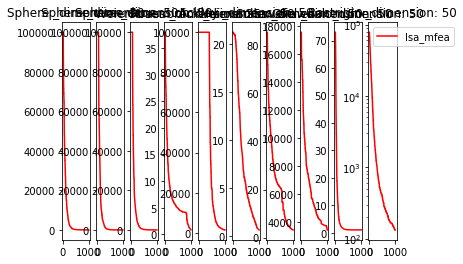

In [4]:
def visual_result(history, name, tasks):
    _, bieudo = plt.subplots(1, NUMBER_TASKS)
    color = ['r', 'b', 'y']

    for task in range(NUMBER_TASKS):
        for version in range(len(history)):
            x_axis = np.arange(len(history[version]))
            y_axis =  [x[task].cost for x in history[version]]

            bieudo[task].plot(x_axis,y_axis, color[version], label = name[version])
            ymin, y_max = min(y_axis), max(y_axis)
            plt.yscale('log')
            # plt.ylim(ymin, 1)
            bieudo[task].set (title= tasks[task].name)
    plt.legend(loc = 'best')
    plt.show()



    
# tasks = getManyTask50()  
tasks = getManyTasks10()   
history= []
# print("lsa_mfea")
# hi, history_rmp = lsa_mfea(tasks)
# # for number_rmp in range(len(history_rmp[0])):
# history.append(hi)
# print("mfea")
history.append(mfea2(tasks))


# print(len(history_rmp[0]))

# import pygame 

# pygame.mixer.init()
# pygame.mixer.music.load("D:/LinhTinh/warning_audio.mp3")
# pygame.mixer.music.play()

# import time 
# time.sleep(1) 
visual_result(history, ["lsa_mfea", "mfea"], tasks)




In [5]:
fig = plt.figure(figsize = (30, 4), dpi= 1000)
fig.suptitle("SA RMP Val\n", size = 15)
fig.set_facecolor("white")

for i in range (len(tasks) - 1):
    for j in range (i + 1, len(tasks)): 
        plt.subplot(1, len(tasks), i + 1)

        plt.plot(np.arange(len(history_rmp[index_convert_matrix_to_1D(i,j,len(tasks))])), np.array(history_rmp[index_convert_matrix_to_1D(i,j,len(tasks))]), label= 'task: ' +str( j))
        plt.legend()



    plt.title('task ' + str( i))
    plt.xlabel("Epoch")
    plt.ylabel("M_rmp")
    plt.ylim(bottom = -0.1, top = 1.1)